# Extraindo as Letras da Discografia do One Direction

One Direction foi uma *boyband* britânico-irlandesa de música *pop* formada na cidade de Londres, Reino Unido, em 2010. O grupo era formado por Louis Tomlinson, Harry Styles, Liam Payne, Niall Horan e Zayn Malik. Malik saiu do grupo em 2015 e One Direction continuou como um quarteto até 2016, quando o grupo entrou em hiato prolongado. O quinteto foi formado após seus membros participarem do *reality show* musical *The X Factor* como competidores solo, até que, durante o programa, a cantora Nicole Scherzinger e o produtor Simon Cowell os uniram para concorrer como um grupo. A banda acabou em terceiro lugar do programa, atrás apenas de Rebecca Ferguson e Matt Cardle, respectivamente.

O grupo saiu do *The X Factor* com um grande sucesso, tanto que, com a força das redes sociais, seus dois primeiros álbuns, *Up All Night* (2011) e *Take Me Home* (2012), quebraram muitos recordes, além de alcançarem o topo das paradas pelo mundo todo, gerando singles de sucesso, incluindo *"What Makes You Beautiful"* e *"Live While We're Young"*. Muitas vezes descritos como os novos The Beatles, o grupo provocou o ressurgimento do conceito *boyband* e de fazer parte de uma nova "Invasão Britânica", sucedendo aos The Beatles e às Spice Girls. Além disso, o grupo entrou para o livro dos recordes, o *Guinness Book*, com seis recordes mundiais jamais alcançados por qualquer outra *boyband*.

A *boyband* já vendeu mais de 19 milhões de *singles* por todo o mundo, 10 milhões de álbuns, e arrecadou 5 milhões em apenas 10 apresentações, com sua primeira turnê em 2012. No total, foram mais de 70 milhões de discos e *singles *vendidos em todo o mundo, vinte e seis milhões apenas nos Estados Unidos, tornando-se um dos grupos recordistas de vendas a nível global. De acordo com Nick Gatfield, presidente da Sony Music Entertainment, o One Direction possuía uma fortuna de 50 milhões de dólares em junho de 2012. Também foram proclamados como os "Artistas que mais venderam mundialmente" em 2013 pela IFPI, "Sucesso Global" pelo *Brit Awards* em 2014, "Artista Do Ano" pelo AMAs em 2015 e em 2016 o "Melhor Grupo ou Duo" pela *Billboard*.

Em agosto de 2024, a *Billboard* anunciou que havia colocado o One Direction no 22.º posto da sua contagem das maiores estrelas pop do período 2000-2024, destacando que o grupo provou que arquétipo da *boyband *ainda poderia prosperar no século 21, que a invasão pop britânica que o grupo liderou no início dos anos 2010 ajudou nomes como Ed Sheeran, The Wanted e Little Mix a serem ouvidos no mundo todo, que o One Direction moldou o modelo para o estrelato pop e que os seus superfãs, chamados ‘Directioners’, mudaram a comunicação entre fãs e os relacionamentos entre fãs e artistas para sempre”.

Mais informações no link: https://pt.wikipedia.org/wiki/One_Direction

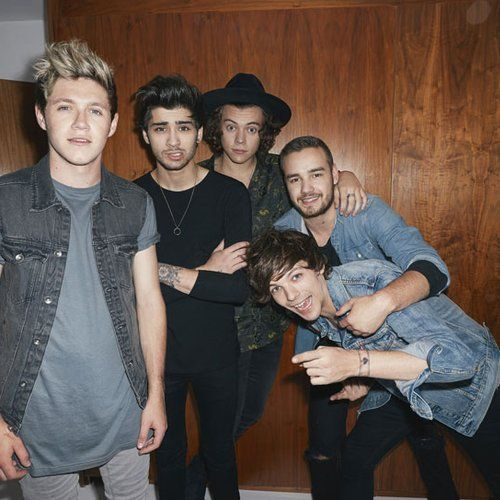

## API LyricsGenius

A API LyricsGenius é uma poderosa ferramenta que permite acessar uma vasta coleção de letras de músicas e informações sobre artistas. Desenvolvida pela Genius, uma plataforma conhecida por sua base de dados de letras e anotações, a API oferece funcionalidades que facilitam a busca por letras, detalhes de álbuns, informações sobre colaboradores e muito mais. Com suporte a consultas por nome de artista, título da música ou até mesmo trechos de letras, a API é especialmente útil para desenvolvedores que desejam integrar dados musicais em aplicativos e sites. Além disso, a API fornece recursos para obter anotações e interpretações das letras, enriquecendo a experiência do usuário ao explorar o significado das músicas. Através da LyricsGenius API, os amantes da música e os desenvolvedores podem aprofundar sua compreensão sobre as canções e seus criadores, trazendo um novo nível de interação com a música.

Mais informações e a documentação de como usar a API no link: https://docs.genius.com/

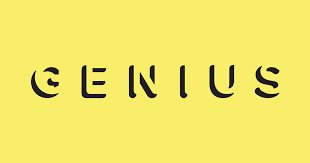

In [ ]:
import os
import pandas as pd
import requests
import lyricsgenius
import csv

# Chamada de Requisição
api_key = "YOUR_API_KEY"
genius = lyricsgenius.Genius(api_key)

# Busca do artista na API
artist = genius.search_artist("One Direction", max_songs=90)

Searching for songs by One Direction...

Song 1: "Night Changes"
Song 2: "What Makes You Beautiful"
Song 3: "Story of My Life"
Song 4: "Perfect"
Song 5: "Drag Me Down"
Song 6: "18"
Song 7: "History"
Song 8: "If I Could Fly"
Song 9: "Little Things"
Song 10: "You & I"
Song 11: "Steal My Girl"
Song 12: "No Control"
Song 13: "Infinity"
Song 14: "Olivia"
Song 15: "Best Song Ever"
Song 16: "A.M."
Song 17: "Walking in the Wind"
Song 18: "Love You Goodbye"
Song 19: "Fool’s Gold"
Song 20: "Over Again"
Song 21: "What a Feeling"
Song 22: "Stockholm Syndrome"
Song 23: "They Don’t Know About Us"
Song 24: "Temporary Fix"
Song 25: "End of the Day"
Song 26: "One Thing"
Song 27: "Midnight Memories"
Song 28: "Kiss You"
Song 29: "Where Do Broken Hearts Go"
Song 30: "Diana"
Song 31: "Strong"
Song 32: "More Than This"
Song 33: "I Want to Write You a Song"
Song 34: "Home"
Song 35: "Through the Dark"
Song 36: "Right Now"
Song 37: "Hey Angel"
Song 38: "Fireproof"
Song 39: "Live While We’re Young"
Song 40: "Ha

In [ ]:
# Importando para um arquivo json
artist.save_lyrics()

Wrote Lyrics_OneDirection.json.


In [ ]:
# Acessando as chaves principais dos dados contidos no arquivo JSON
data = json.load(open("Lyrics_OneDirection.json", "r"))
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'followers_count', 'description_annotation', 'user', 'songs'])

In [ ]:
# Carregando dados em um dataframe e examinando os dados dentro de 'songs'
df = pd.DataFrame(data['songs'])
df.keys()

Index(['annotation_count', 'api_path', 'artist_names', 'full_title',
       'header_image_thumbnail_url', 'header_image_url', 'id',
       'lyrics_owner_id', 'lyrics_state', 'path', 'primary_artist_names',
       'pyongs_count', 'relationships_index_url', 'release_date_components',
       'release_date_for_display',
       'release_date_with_abbreviated_month_for_display',
       'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title',
       'title_with_featured', 'url', 'featured_artists', 'primary_artist',
       'primary_artists', 'apple_music_id', 'apple_music_player_url',
       'description', 'embed_content', 'featured_video', 'language',
       'recording_location', 'release_date', 'current_user_metadata',
       'song_art_primary_color', 'song_art_secondary_color',
       'song_art_text_color', 'album', 'custom_performances',
       'description_annotation', 'lyrics_marked_complete_by',
       'lyrics_marked_staff_approved_by', 'media', 'producer_artists',
     

In [ ]:
# Selecionando os dados úteis em um novo dataframe
df_oficial = df[['title', 'lyrics', 'release_date']].copy()

# Classificando as músicas pelo álbum
df_oficial['Album'] = df['album'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

# Reseta o índice, se necessário
df_oficial.reset_index(drop=True, inplace=True)

# Convertendo a coluna 'release_date' para o formato de data
df_oficial['release_date'] = pd.to_datetime(df_oficial['release_date'], errors='coerce')

# Extraindo apenas o ano da coluna 'release_date' para armazenar na 'release_year'
df_oficial['release_year'] = df_oficial['release_date'].dt.year

# Exibindo o dataframe resultante
df_oficial

,title,lyrics,release_date,Album,release_year
0,Night Changes,"[Verse 1: Zayn & Liam]\nGoin' out tonight, cha...",2014-11-14,FOUR (The Ultimate Edition),2014.0
1,What Makes You Beautiful,"[Verse 1: Liam]\nYou're insecure, don't know w...",2011-09-11,Up All Night (The Souvenir Edition),2011.0
2,Story of My Life,[Verse 1: Harry & Liam]\nWritten in these wall...,2013-10-28,Midnight Memories (Japan Edition),2013.0
3,Perfect,[Verse 1: Louis]\nI might never be your knight...,2015-10-16,Made In The A.M. (Ultimate Fan Edition) [Japan...,2015.0
4,Drag Me Down,"[Verse: Harry]\nI've got fire for a heart, I'm...",2015-07-31,Made In The A.M. (Ultimate Fan Edition) [Japan...,2015.0
...,...,...,...,...,...
85,Tell Me a Lie,"[Verse 1: Liam, Zayn]\nCan't ever get it right...",2011-11-18,Up All Night (The Souvenir Edition),2011.0
86,Loved You First,"[Verse 1: Zayn, Liam]\nGirl, it should be me d...",2012-11-09,Take Me Home (Special Deluxe Edition),2012.0
87,Everything About You,"[Verse 1: Liam, Harry]\nYou know I've always g...",2011-11-18,Up All Night (The Souvenir Edition),2011.0
88,Na Na Na,"[Verse 1: Liam, Zayn, Liam & Harry]\nWe've got...",2011-11-18,Up All Night (The Souvenir Edition),2011.0


In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Define uma função para remover stopwords de um texto
def remove_stopwords(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras que não estão na lista de stopwords em inglês
    text = [x for x in text if x not in stopwords.words('english')]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de stopwords em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_stopwords(x))

# Define uma função para remover pontuação do texto
def remove_ponctuation(text):
    # Usa uma expressão regular para manter apenas letras (maiúsculas e minúsculas) e junta as palavras em uma string
    return " ".join(re.findall("[a-zA-Z]+", text))

# Aplica a função de remoção de pontuação em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_ponctuation(x))

# Define uma função para remover palavras com menos de 3 caracteres do texto
def remove_words_with_less_3(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras com mais de 3 caracteres
    text = [x for x in text if len(x) > 3]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de palavras curtas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_words_with_less_3(x))

# Converte todo o texto em letras minúsculas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: x.lower())

# Cria uma nova coluna 'Word Count' no dataframe que conta o número de palavras em cada linha da coluna 'lyrics'
df_oficial['Word Count'] = df_oficial['lyrics'].apply(lambda x: len(x.split(' ')))

# Função para remover as palavras indesejadas
def remove_unwanted_words(text):
    words_to_remove = ["embed", "intro", "verse", "chorus", "outro", "instrumental"]
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Aplicar a função na coluna de letras
df_oficial["lyrics"] = df_oficial["lyrics"].apply(remove_unwanted_words)

# Salvar o CSV atualizado
df_oficial.to_csv("OneDirectionLyrics.csv", index=False)

In [ ]:
import sqlite3

# Criando um banco de dados de teste
conn = sqlite3.connect('LittleMix.db')

# Salvando no banco de dados
df_oficial.to_sql('lyrics', conn, index=False)

# Verificando se os dados estão presentes no banco de dados
c = conn.cursor()
c.execute('''
SELECT * FROM LYRICS
          ''')
# Visualização do Banco de Dados gerado
c.fetchall()

[('Night Changes',
  ' zayn liam goin tonight changes somethin mother like kind dress everything never showin drivin fast moon breakin hair headin somethin forget havin regrets really wants  harry gettin older baby thinkin lately does ever drive crazy just fast night changes everything ever dreamed disappearin wake there nothin afraid even night changes never change  louis niall chasin tonight doubts runnin round head waitin hides behind cigarette heart beatin loud want stop movin fast moon lightin skin fallin even know havin regrets really wants  harry gettin older baby thinkin lately does ever drive crazy just fast night changes everything ever dreamed disappearin wake there nothin afraid even night changes never change post  liam bridge zayn goin tonight changes somethin mother like kind dress reminds missin piece innocence lost  harry gettin older baby thinkin lately does ever drive crazy just fast night changes everything ever dreamed disappearin wake there nothin afraid even nigh